In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Data preprocessing:
df_bank=pd.read_csv(r'D:\aa sem 2\aaa lab\PRML\lab2\bank.csv')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
# duration column not needed as per the dataset documentation
df_bank=df_bank.drop('duration',axis=1)
print('shape of dataframe:',df_bank.shape)
df_bank.head()
# distribution of class ,whether binary or not
df_bank['deposit'].value_counts()
# checking for missing values:
df_bank.isnull().sum()

shape of dataframe: (11162, 16)


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [4]:

from sklearn.preprocessing import StandardScaler

#copying original data frame
df_bank_ready=df_bank.copy()
scaler=StandardScaler()
num_cols=['age','balance','day','campaign','pdays','previous']
df_bank_ready[num_cols]=scaler.fit_transform(df_bank_ready[num_cols])
df_bank_ready.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,yes
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,yes
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,yes
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,yes
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,-0.186785,-0.481184,-0.36326,unknown,yes


In [5]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False)
cat_cols=['job','marital','education','default','housing','loan','contact','month','poutcome']

# Encode categorical data:
df_encoded=pd.DataFrame(encoder.fit_transform(df_bank_ready[cat_cols]))
df_encoded.columns=encoder.get_feature_names(cat_cols)
        

# replacing categorical data with encoded data
df_bank_ready=df_bank_ready.drop(cat_cols,axis=1)
df_bank_ready=pd.concat([df_encoded,df_bank_ready],axis=1)

In [6]:
# encode the target value
df_bank_ready['deposit']=df_bank_ready['deposit'].apply(lambda x:1 if x=='yes' else 0)

print('shape of the dataframe:',df_bank_ready.shape)
df_bank_ready.head()

shape of the dataframe: (11162, 51)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,deposit
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.491505,0.252525,-1.265746,-0.554168,-0.481184,-0.36326,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.239676,-0.459974,-1.265746,-0.554168,-0.481184,-0.36326,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.019470,-0.080160,-1.265746,-0.554168,-0.481184,-0.36326,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.155733,0.293762,-1.265746,-0.554168,-0.481184,-0.36326,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.071790,-0.416876,-1.265746,-0.186785,-0.481184,-0.36326,1


In [8]:
feature=df_bank_ready.drop('deposit',axis=1)

#select target
target=df_bank_ready['deposit']

# select training and testing data:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(feature,target,shuffle=True,test_size=0.2,random_state=1)

# show the Training and Testing data:
print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (8929, 50)
Shape of testing feature: (2233, 50)
Shape of training label: (8929,)
Shape of training label: (2233,)


In [9]:
from sklearn import tree

# building decision tree model,
dtc=tree.DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

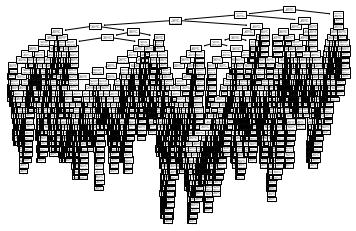

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
tree.plot_tree(dtc)
plt.show()

In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.image as pltimg 
import pydotplus
from sklearn.tree import export_graphviz

In [42]:
#Data preprocessing:
data=pd.read_csv(r'D:\aa sem 2\aaa lab\PRML\lab2\data10.csv')

In [43]:
data.head()

,x1,x2,x3,y1
0,1,1,2,1
1,1,1,4,1
2,1,1,5,1
3,1,1,6,1
4,1,1,8,1


In [44]:
data.columns

Index(['x1', 'x2', 'x3', 'y1'], dtype='object')

In [45]:
type(data) 

pandas.core.frame.DataFrame

In [47]:
features = ['x1','x2','x3']
X = data[features]

In [54]:
y1=data['y1']

In [55]:
print(X)

     x1  x2  x3
0     1   1   2
1     1   1   4
2     1   1   5
3     1   1   6
4     1   1   8
..   ..  ..  ..
268  10   7   6
269  10   7   8
270  10   8   8
271  10   8  10
272  10   9   7

[273 rows x 3 columns]


In [56]:
print(y1)

0      1
1      1
2      1
3      1
4      1
      ..
268    0
269    0
270    0
271    0
272    0
Name: y1, Length: 273, dtype: int64


In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [58]:
def entropy(y): 
    hist = np.bincount(y) 
    ps = hist / len(y) 
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

In [59]:
class Node: 
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature 
        self.threshold = threshold 
        self.left = left 
        self.right = right 
        self.value = value
    def is_leaf_node(self): 
        return self.value is not None

class DecisionTree: 
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None): 
        self.min_samples_split = min_samples_split 
        self.max_depth = max_depth 
        self.n_feats = n_feats 
        self.root = None
    
def fit(self, X, y):
    self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
    self.root = self._grow_tree(X, y)
    
def predict(self, X): 
    return np.array([self._traverse_tree(x, self.root) for x in X])

def _grow_tree(self, X, y, depth=0): 
    n_samples, n_features = X.shape 
    n_labels = len(np.unique(y))


In [64]:
import pydotplus
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image

In [66]:
dot_data = StringIO() 
export_graphviz(DecisionTree, out_file=dot_data, filled=True, rounded=True,
                special_characters=True,feature_names = features,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('COMPUTER_BUYING_decision_tree.png') 
Image(graph.create_png())

TypeError: <class '__main__.DecisionTree'> is a class, not an instance.